In [1]:
#https://www.kaggle.com/datasets/captainozlem/framingham-chd-preprocessed-data

In [2]:
#import pandas as pd
import numpy as np
import pandas as pd

#to check the data type
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

#for visulazation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#to build and analyze various statistical models we use"statsmodels"
import scipy
import statsmodels
from scipy import stats
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#for multicolineraity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
#for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.utils import resample
#for decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
#Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
#Adaptive boosting 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
#for random forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
#Search methods
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Naive bayes classifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, accuracy_score 
import warnings
warnings.filterwarnings("ignore")
#np.set_printoptions(suppress=True)


In [3]:
data= pd.read_csv("framingham.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4136 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4188 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   int64  
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4220 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3863 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(8)
memory usage: 529.9 KB


In [5]:
data.shape

(4238, 16)

In [6]:
data.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4136.000000,4238.000000,4211.000000,4188.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4220.000000,4237.000000,3863.000000,4238.000000
mean,0.429212,49.584946,1.978965,0.494101,9.010686,0.029608,0.005899,0.310524,0.025720,236.297310,132.352407,82.893464,25.802206,75.878924,81.951592,0.151958
std,0.495022,8.572160,1.019658,0.500024,11.922857,0.169525,0.076587,0.462763,0.158316,44.500499,22.038097,11.910850,4.079648,12.026596,23.926544,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
data.isnull().sum()

gender               0
age                  0
education          102
currentSmoker        0
cigsPerDay          27
BPMeds              50
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                 18
heartRate            1
glucose            375
TenYearCHD           0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data['gender'].unique()

array([1, 0], dtype=int64)

In [10]:
data['education'].unique()

array([ 4.,  2.,  1.,  3., nan])

In [11]:
data['currentSmoker'].unique()

array([0, 1], dtype=int64)

In [12]:
data.dtypes

gender               int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol              int64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [13]:
data[data["TenYearCHD"]==0].head(10)

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245,127.5,80.0,25.34,75.0,70.0,0
4,0,46,3.0,1,23.0,0.0,0,0,0,285,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228,180.0,110.0,30.30,77.0,99.0,0
7,0,45,2.0,1,20.0,0.0,0,0,0,313,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225,162.0,107.0,23.61,93.0,88.0,0
10,0,50,1.0,0,0.0,0.0,0,0,0,254,133.0,76.0,22.91,75.0,76.0,0
11,0,43,2.0,0,0.0,0.0,0,0,0,247,131.0,88.0,27.64,72.0,61.0,0


In [14]:
data[data["TenYearCHD"]==1].head(10)

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3,0,61,3.0,1,30.0,0.0,0,1,0,225,150.0,95.0,28.58,65.0,103.0,1
6,0,63,1.0,0,0.0,0.0,0,0,0,205,138.0,71.0,33.11,60.0,85.0,1
15,0,38,2.0,1,20.0,0.0,0,1,0,221,140.0,90.0,21.35,95.0,70.0,1
17,0,46,2.0,1,20.0,0.0,0,0,0,291,112.0,78.0,23.38,80.0,89.0,1
25,1,47,4.0,1,20.0,0.0,0,0,0,294,102.0,68.0,24.18,62.0,66.0,1
28,0,61,3.0,0,0.0,0.0,0,1,0,272,182.0,121.0,32.80,85.0,65.0,1
32,0,59,1.0,0,0.0,0.0,0,1,0,209,150.0,85.0,20.77,90.0,88.0,1
33,1,61,1.0,1,5.0,0.0,0,0,0,175,134.0,82.5,18.59,72.0,75.0,1
42,0,52,1.0,0,0.0,1.0,0,1,0,237,148.0,92.0,25.09,70.0,NaN,1
44,0,53,3.0,0,0.0,1.0,0,1,1,311,206.0,92.0,21.51,76.0,215.0,1


In [15]:
#TenYearCHD 

In [16]:
data.TenYearCHD.isnull().sum()

0

In [17]:
data.TenYearCHD.value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

Text(0.5, 1.0, 'barplotof TenYearCHD')

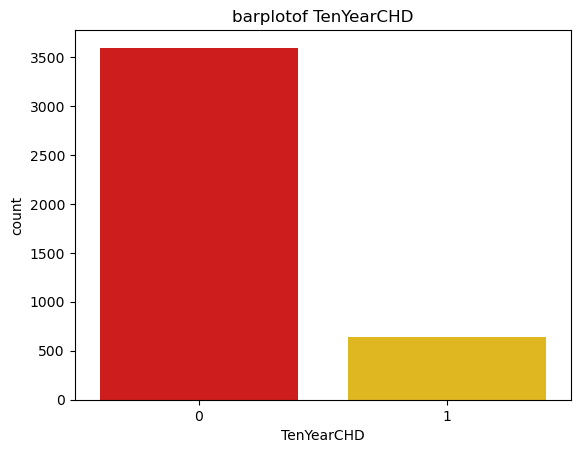

In [18]:
sns.countplot(x="TenYearCHD",data=data, palette="hot")
plt.title("barplotof TenYearCHD")


In [19]:
#gender

In [20]:
data.gender.isnull().sum()

0

In [21]:
data.gender.value_counts()

0    2419
1    1819
Name: gender, dtype: int64

Text(0.5, 1.0, 'gender')

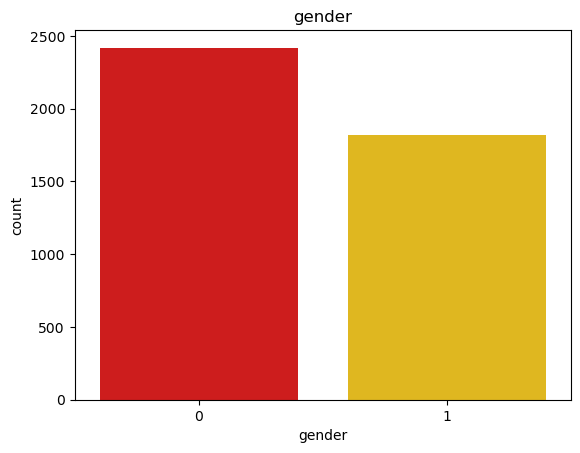

In [22]:
sns.countplot(x="gender",data=data, palette="hot")
plt.title("gender")

In [23]:
#age 

In [24]:
data.age.isnull().sum()

0

In [25]:
data.age .value_counts()

40    191
46    182
42    180
41    174
48    173
39    169
44    166
45    162
43    159
52    149
51    146
55    145
38    144
47    141
50    140
53    139
54    132
49    132
57    123
56    123
59    119
58    117
60    111
63    110
61    110
62     99
64     93
37     92
36     84
65     57
67     45
35     42
66     38
34     18
68     18
69      7
33      5
70      2
32      1
Name: age, dtype: int64

Text(0.5, 1.0, 'age ')

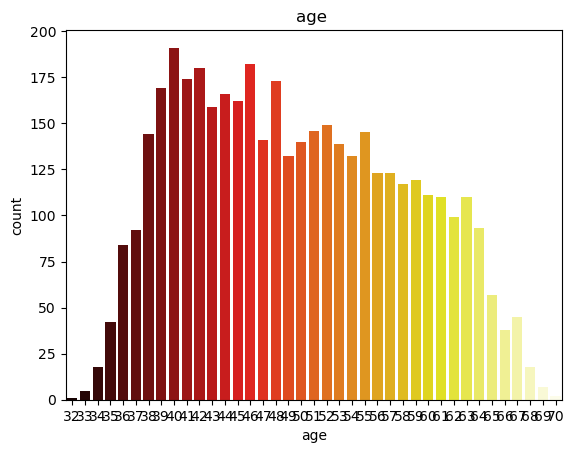

In [26]:
sns.countplot(x="age",data=data, palette="hot")
plt.title("age ")

In [27]:
#education

In [28]:
data.education.value_counts()

1.0    1721
2.0    1254
3.0     688
4.0     473
Name: education, dtype: int64

In [29]:
data.education.isnull().sum()

102

In [30]:
data.education.mode()

0    1.0
Name: education, dtype: float64

In [31]:
data.education.fillna(float('1.0'),inplace=True)

Text(0.5, 1.0, 'education ')

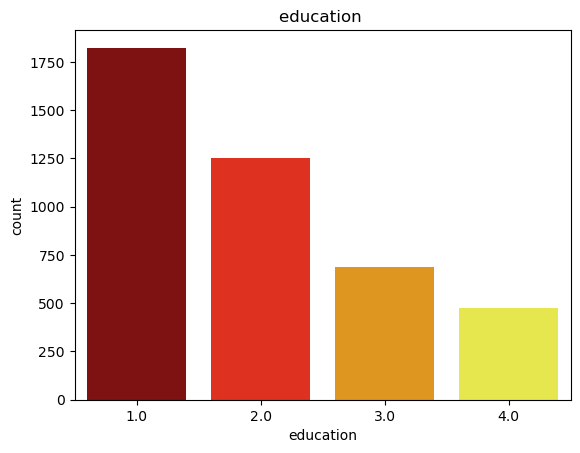

In [32]:
sns.countplot(x="education",data=data, palette="hot")
plt.title("education ")

In [33]:
#cigsPerDay 

In [34]:
data.cigsPerDay.value_counts()

0.0     2144
20.0     735
30.0     218
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
2.0       18
6.0       18
7.0       12
8.0       11
60.0      11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
45.0       3
13.0       3
12.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: cigsPerDay, dtype: int64

In [35]:
data.cigsPerDay.isnull().sum()

27

In [36]:
data.cigsPerDay.mode()

0    0.0
Name: cigsPerDay, dtype: float64

In [37]:
data.cigsPerDay.fillna(float('0.0'),inplace=True)

Text(0.5, 1.0, 'cigsPerDay')

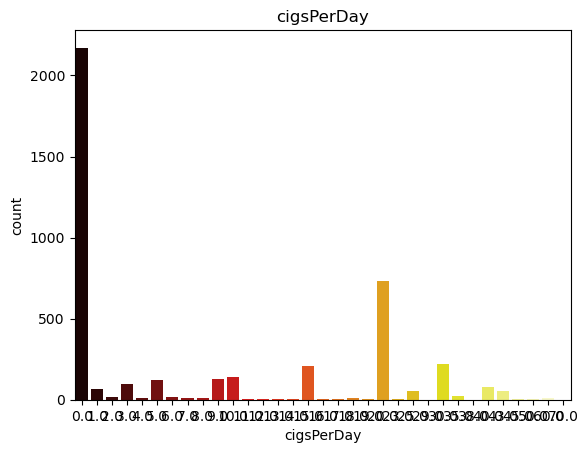

In [38]:
sns.countplot(x="cigsPerDay",data=data, palette="hot")
plt.title("cigsPerDay")

In [39]:
#BPMeds

In [40]:
data.BPMeds.value_counts()

0.0    4064
1.0     124
Name: BPMeds, dtype: int64

In [41]:
data.BPMeds.isnull().sum()

50

In [42]:
data.BPMeds.mode()

0    0.0
Name: BPMeds, dtype: float64

In [43]:
data.BPMeds.fillna(float('0.0'),inplace=True)

Text(0.5, 1.0, 'BPMeds')

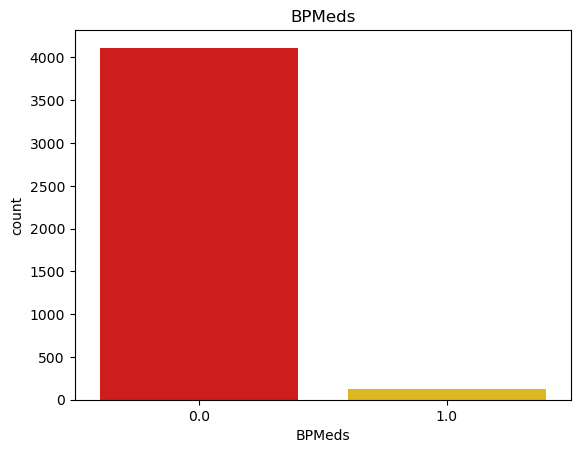

In [44]:
sns.countplot(x="BPMeds",data=data, palette="hot")
plt.title("BPMeds")

In [45]:
# prevalentStroke

In [46]:
data.prevalentStroke.value_counts()

0    4213
1      25
Name: prevalentStroke, dtype: int64

In [47]:
data.prevalentStroke.isnull().sum()

0

Text(0.5, 1.0, 'prevalentStroke')

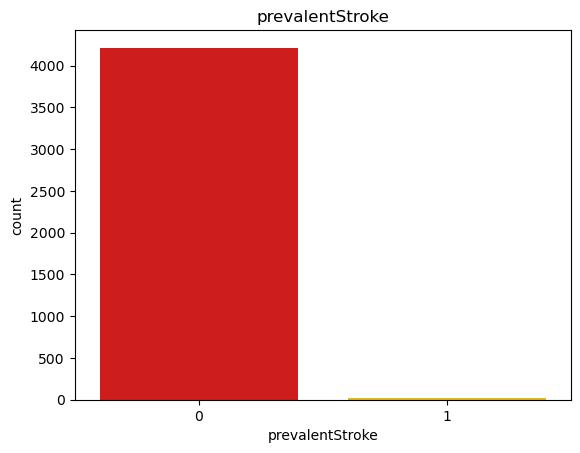

In [48]:
sns.countplot(x="prevalentStroke",data=data, palette="hot")
plt.title("prevalentStroke")

In [49]:
#prevalentHyp

In [50]:
data.prevalentHyp.value_counts()

0    2922
1    1316
Name: prevalentHyp, dtype: int64

In [51]:
data.prevalentHyp.isnull().sum()

0

Text(0.5, 1.0, 'prevalentHyp')

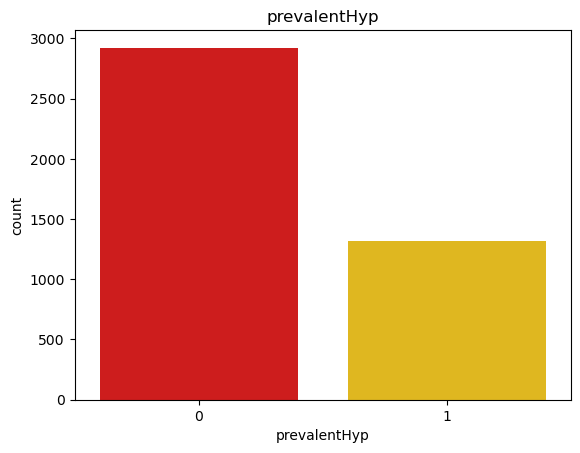

In [52]:
sns.countplot(x="prevalentHyp",data=data, palette="hot")
plt.title("prevalentHyp")

In [53]:
#diabetes

In [54]:
data.diabetes.value_counts()

0    4129
1     109
Name: diabetes, dtype: int64

In [55]:
data.diabetes.isnull().sum()

0

Text(0.5, 1.0, 'diabetes')

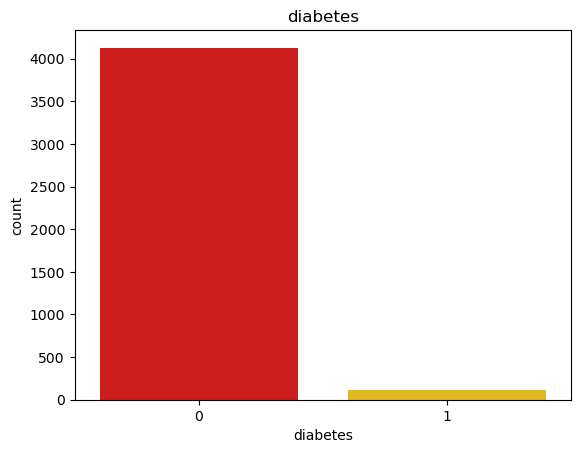

In [56]:
sns.countplot(x="diabetes",data=data, palette="hot")
plt.title("diabetes")

In [57]:
#totChol 

In [58]:
data.totChol .value_counts()

200    103
240     85
220     70
260     62
210     61
      ... 
392      1
405      1
359      1
398      1
119      1
Name: totChol, Length: 248, dtype: int64

In [59]:
data.totChol.isnull().sum()

0

Text(0.5, 1.0, 'histogram of totChol')

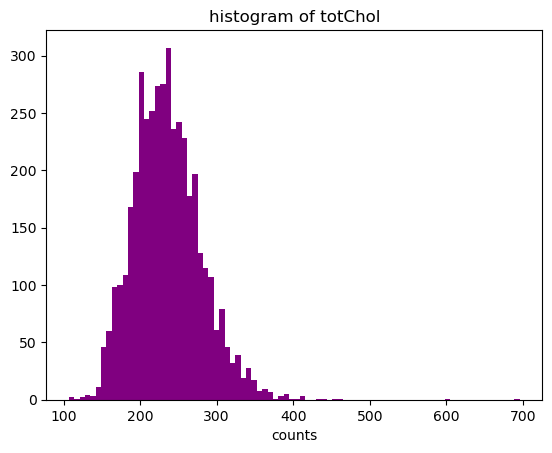

In [60]:
plt.hist(data.totChol,bins="auto",facecolor="purple")
plt.xlabel("totChol")
plt.xlabel("counts")
plt.title("histogram of totChol")

<AxesSubplot:>

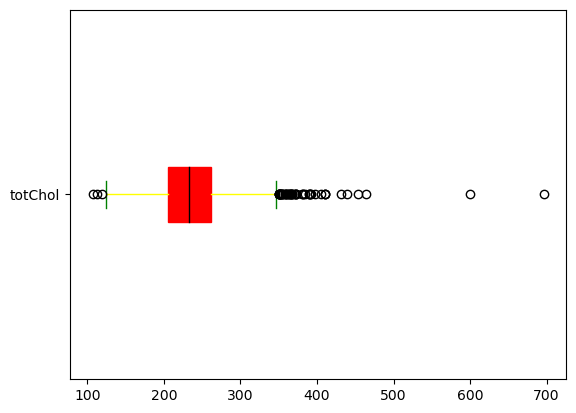

In [61]:
props2=dict(boxes="red",whiskers="yellow",medians="black",caps="green")
data['totChol'].plot.box(color=props2,patch_artist=True,vert=False)


In [62]:
kp1_IQR =data.totChol.describe()["75%"]-data.totChol.describe()["25%"]
kp1_uplim =data.totChol.describe()["75%"]+1.5*kp1_IQR
len(data.totChol[data.totChol> kp1_uplim])


53

In [63]:
data.totChol= np.where(data.totChol>kp1_uplim ,kp1_uplim ,data.totChol)


<AxesSubplot:>

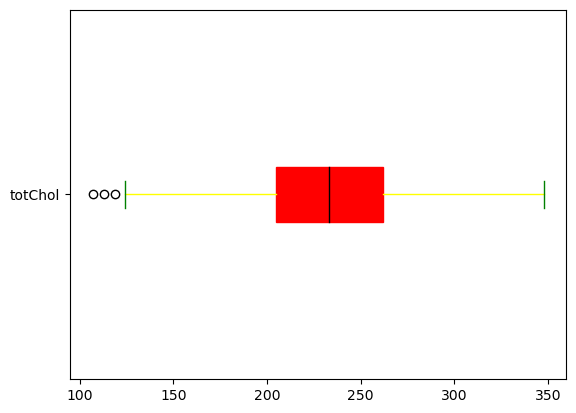

In [64]:
data['totChol'].plot.box(color=props2,patch_artist=True,vert=False)


Text(0.5, 1.0, 'totChol')

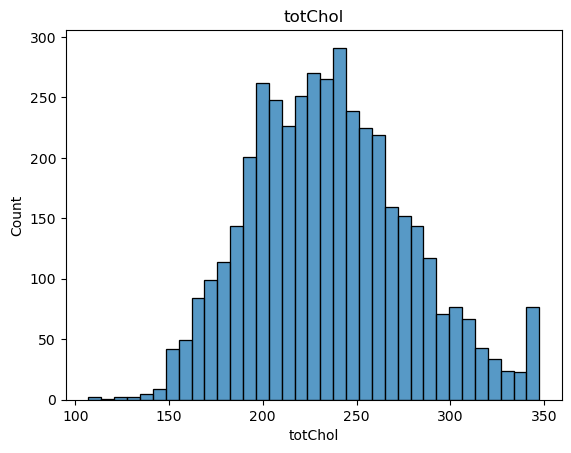

In [65]:
sns.histplot(x="totChol",data=data, palette="hot")
plt.title("totChol")


In [66]:
#sysBP

In [67]:
data.sysBP .value_counts()


120.0    107
130.0    102
110.0     96
115.0     89
125.0     88
        ... 
169.5      1
98.5       1
181.5      1
188.5      1
207.0      1
Name: sysBP, Length: 234, dtype: int64

In [68]:
data.sysBP .isnull().sum()

0

Text(0.5, 1.0, 'histogram of sysBP')

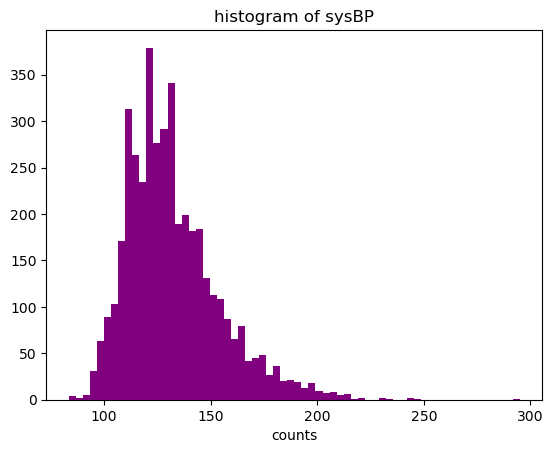

In [69]:
plt.hist(data.sysBP,bins="auto",facecolor="purple")
plt.xlabel("sysBP")
plt.xlabel("counts")
plt.title("histogram of sysBP")

<AxesSubplot:>

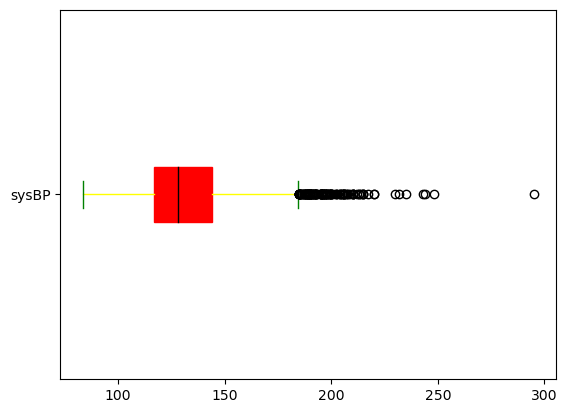

In [70]:
data['sysBP'].plot.box(color=props2,patch_artist=True,vert=False)

In [71]:
kp1_IQR =data.sysBP.describe()["75%"]-data.sysBP.describe()["25%"]
kp1_uplim =data.sysBP.describe()["75%"]+1.5*kp1_IQR
len(data.sysBP[data.sysBP> kp1_uplim])

126

In [72]:
data.sysBP= np.where(data.sysBP>kp1_uplim ,kp1_uplim ,data.sysBP)

<AxesSubplot:>

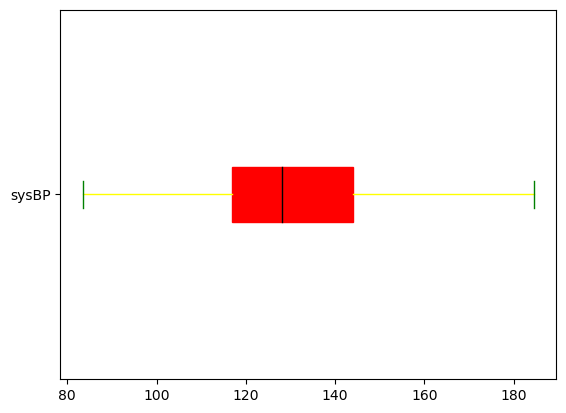

In [73]:
data['sysBP'].plot.box(color=props2,patch_artist=True,vert=False)

Text(0.5, 1.0, 'sysBP')

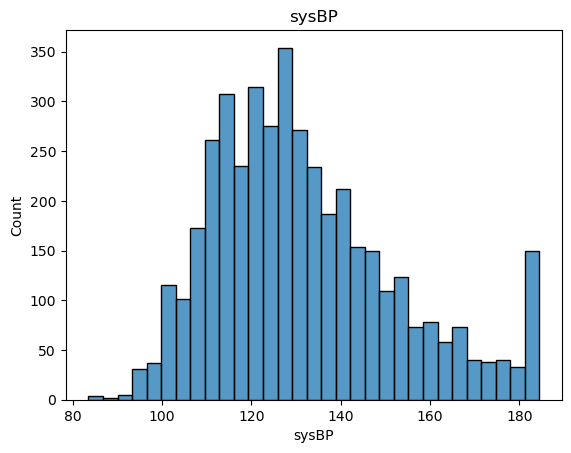

In [74]:
sns.histplot(x="sysBP",data=data, palette="hot")
plt.title("sysBP")

In [75]:
#diaBP

In [76]:
data.diaBP.value_counts()

80.0     262
82.0     152
85.0     137
70.0     135
81.0     131
        ... 
132.0      1
54.0       1
142.5      1
116.5      1
127.5      1
Name: diaBP, Length: 146, dtype: int64

In [77]:
data.diaBP.isnull().sum()

0

Text(0.5, 1.0, 'histogram of diaBP')

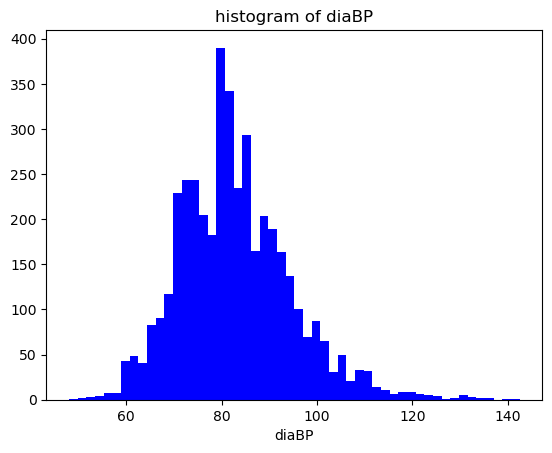

In [78]:
plt.hist(data.diaBP,bins="auto",facecolor="BLUE")
plt.xlabel("diaBP")
plt.xlabel("diaBP")
plt.title("histogram of diaBP")

<AxesSubplot:>

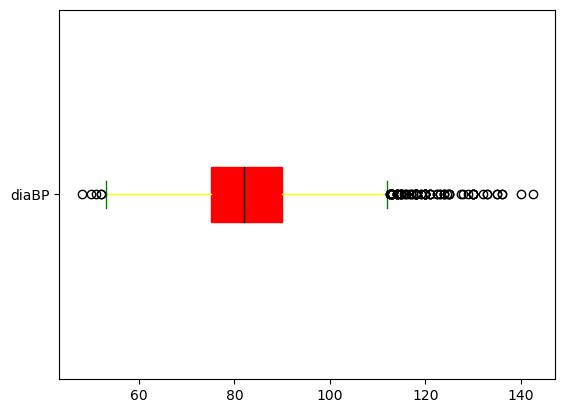

In [79]:
data['diaBP'].plot.box(color=props2,patch_artist=True,vert=False)

In [80]:
kp1_IQR =data.diaBP.describe()["75%"]-data.diaBP.describe()["25%"]
kp1_uplim =data.diaBP.describe()["75%"]+1.5*kp1_IQR
len(data.diaBP[data.diaBP> kp1_uplim])

76

In [81]:
data.diaBP= np.where(data.diaBP>kp1_uplim ,kp1_uplim ,data.diaBP)

<AxesSubplot:>

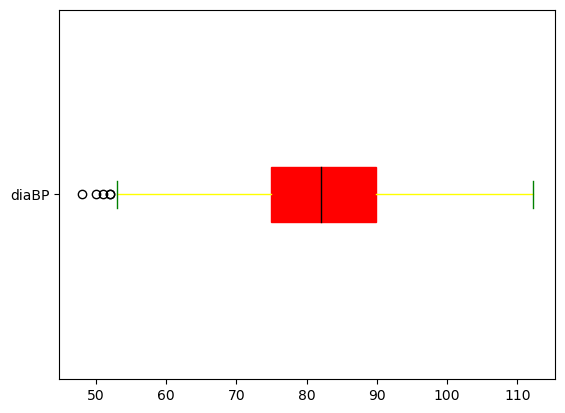

In [82]:
data['diaBP'].plot.box(color=props2,patch_artist=True,vert=False)

Text(0.5, 1.0, 'diaBP')

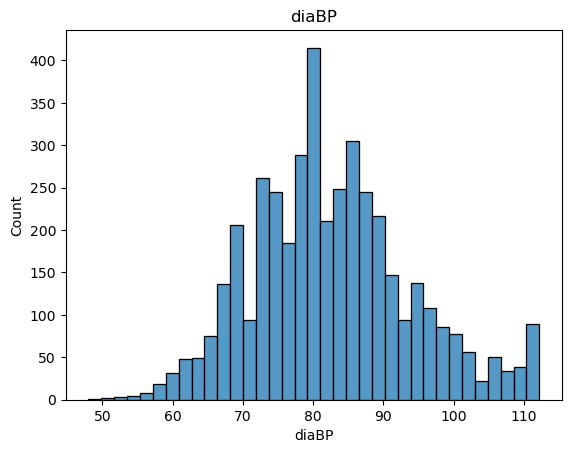

In [83]:
sns.histplot(x="diaBP",data=data, palette="hot")
plt.title("diaBP")

In [84]:
#BMI

In [85]:
data.BMI.value_counts()

22.54    18
22.19    18
23.48    18
22.91    18
25.09    16
         ..
34.13     1
23.21     1
29.13     1
19.87     1
43.67     1
Name: BMI, Length: 1363, dtype: int64

In [86]:
data.BMI.isnull().sum()

18

In [87]:
data.BMI.median()

25.4

In [88]:
data.BMI.fillna(float('25.4'),inplace=True)

Text(0.5, 1.0, 'histogram of BMI')

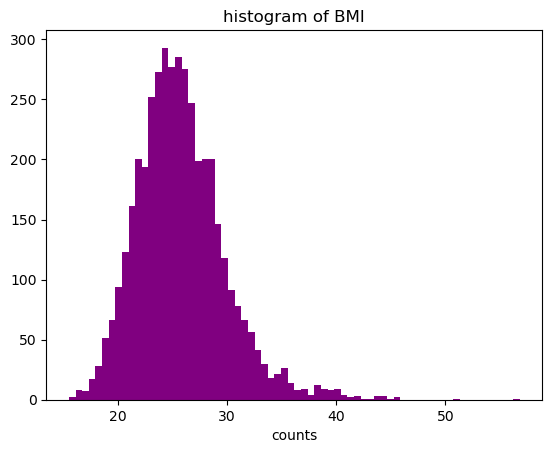

In [89]:
plt.hist(data.BMI,bins="auto",facecolor="purple")
plt.xlabel("BMI")
plt.xlabel("counts")
plt.title("histogram of BMI")

<AxesSubplot:>

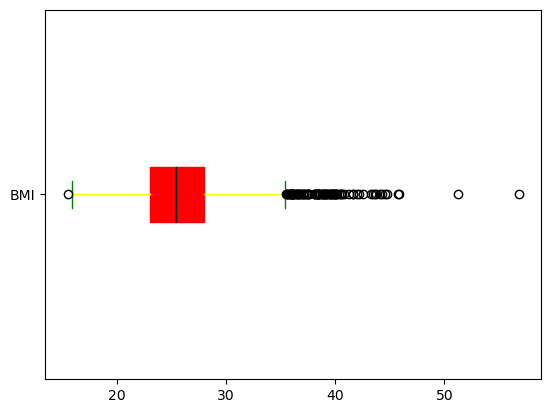

In [90]:
data['BMI'].plot.box(color=props2,patch_artist=True,vert=False)

In [91]:
kp1_IQR =data.BMI.describe()["75%"]-data.BMI.describe()["25%"]
kp1_uplim =data.BMI.describe()["75%"]+1.5*kp1_IQR
len(data.BMI[data.BMI> kp1_uplim])

96

In [92]:
data.BMI= np.where(data.BMI>kp1_uplim ,kp1_uplim ,data.BMI)

<AxesSubplot:>

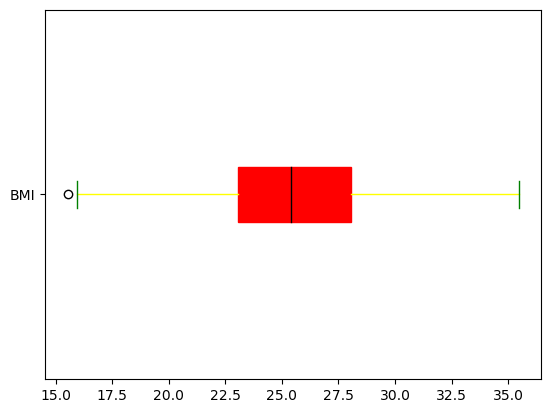

In [93]:
data['BMI'].plot.box(color=props2,patch_artist=True,vert=False)

In [94]:
# heartRate  

In [95]:
data.heartRate .value_counts()

75.0     563
80.0     385
70.0     305
60.0     231
85.0     227
        ... 
47.0       1
130.0      1
140.0      1
51.0       1
46.0       1
Name: heartRate, Length: 73, dtype: int64

In [96]:
data.heartRate .isnull().sum()

1

In [97]:
data.heartRate.mode()

0    75.0
Name: heartRate, dtype: float64

In [98]:
data.heartRate.fillna(float('75.0'),inplace=True)

Text(0.5, 1.0, 'histogram of heartRate')

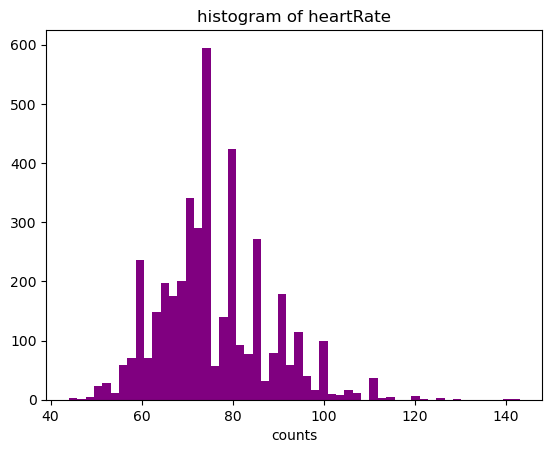

In [99]:
plt.hist(data.heartRate,bins="auto",facecolor="purple")
plt.xlabel("heartRate")
plt.xlabel("counts")
plt.title("histogram of heartRate")

<AxesSubplot:>

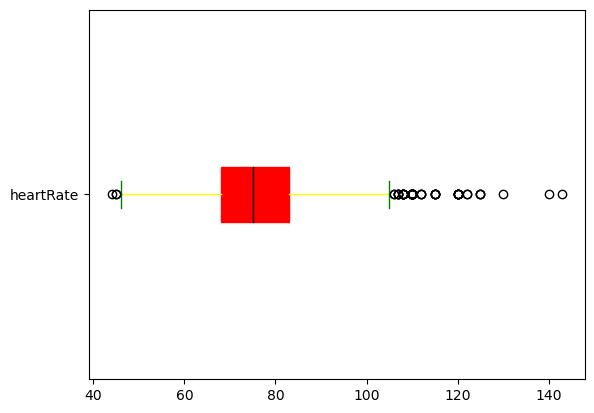

In [100]:
data['heartRate'].plot.box(color=props2,patch_artist=True,vert=False)

In [101]:
kp1_IQR =data.heartRate.describe()["75%"]-data.heartRate.describe()["25%"]
kp1_uplim =data.heartRate.describe()["75%"]+1.5*kp1_IQR
len(data.heartRate[data.heartRate> kp1_uplim])


73

In [102]:
data.heartRate= np.where(data.heartRate>kp1_uplim ,kp1_uplim ,data.heartRate)


<AxesSubplot:>

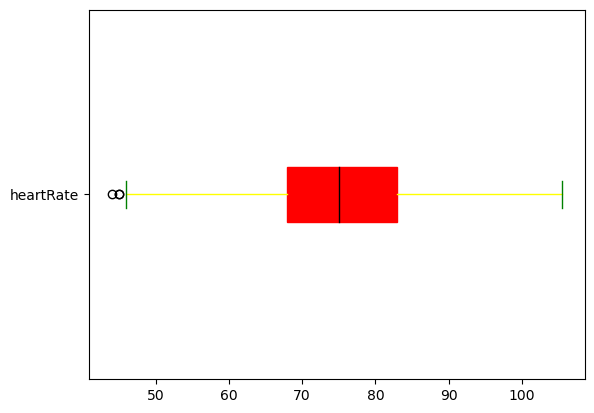

In [103]:
data['heartRate'].plot.box(color=props2,patch_artist=True,vert=False)


<AxesSubplot:>

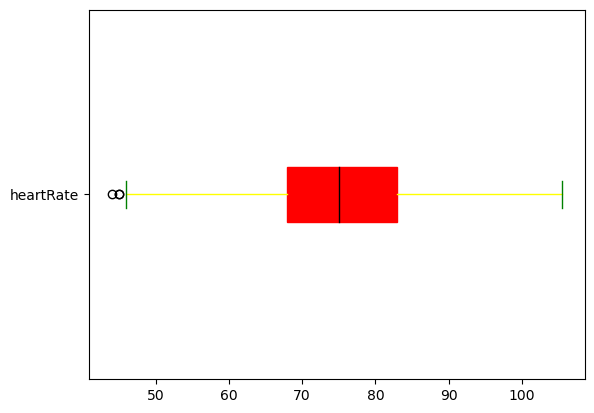

In [104]:
data['heartRate'].plot.box(color=props2,patch_artist=True,vert=False)


In [105]:
#glucose

In [106]:
data.glucose .isnull().sum()

375

In [107]:
data.glucose .value_counts()

75.0     197
77.0     167
73.0     156
80.0     152
70.0     152
        ... 
386.0      1
155.0      1
147.0      1
205.0      1
260.0      1
Name: glucose, Length: 143, dtype: int64

In [108]:
data.glucose.mode()

0    75.0
Name: glucose, dtype: float64

In [109]:
data.glucose.fillna(float('75.0'),inplace=True)

Text(0.5, 1.0, 'histogram of glucose')

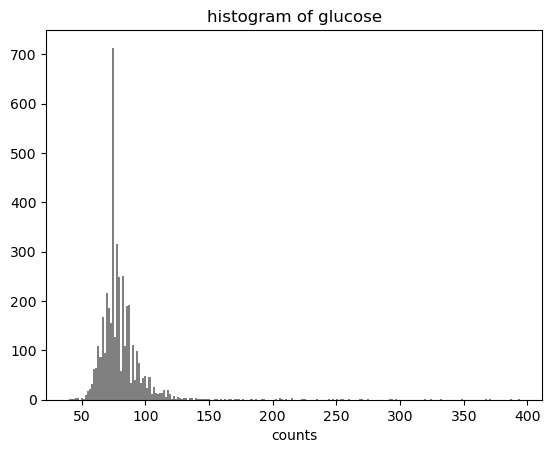

In [110]:
plt.hist(data.glucose,bins="auto",facecolor="grey")
plt.xlabel("glucose")
plt.xlabel("counts")
plt.title("histogram of glucose")

<AxesSubplot:>

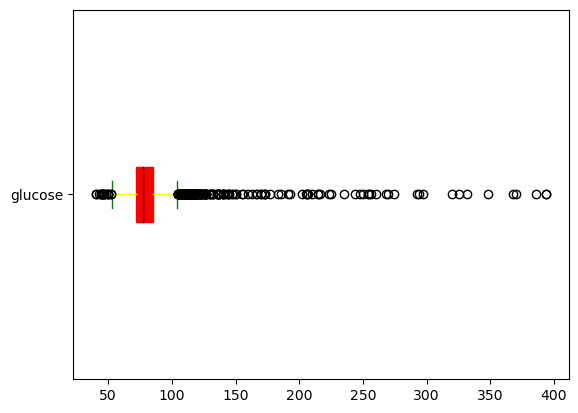

In [111]:
data['glucose'].plot.box(color=props2,patch_artist=True,vert=False)

In [112]:

kp1_IQR =data.glucose.describe()["75%"]-data.glucose.describe()["25%"]
kp1_uplim =data.glucose.describe()["75%"]+1.5*kp1_IQR
len(data.glucose[data.glucose> kp1_uplim])

244

In [113]:
data.glucose= np.where(data.glucose>kp1_uplim ,kp1_uplim ,data.glucose)

In [114]:
data.isnull().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [115]:
#statiticval test for categorical data

In [116]:
gender  =pd.crosstab(data.TenYearCHD ,data.gender , margins = True)
scipy.stats.chi2_contingency(gender  ,correction= False )

(33.13876412178594,
 1.1188330567551435e-06,
 4,
 array([[2051.41245871, 1542.58754129, 3594.        ],
        [ 367.58754129,  276.41245871,  644.        ],
        [2419.        , 1819.        , 4238.        ]]))

In [117]:
education =pd.crosstab(data.TenYearCHD ,data.education , margins = True)
scipy.stats.chi2_contingency(education ,correction= False )

(31.237760583631815,
 0.00012744993690769037,
 8,
 array([[1545.97970741, 1063.44407739,  583.45257197,  401.12364323,
         3594.        ],
        [ 277.02029259,  190.55592261,  104.54742803,   71.87635677,
          644.        ],
        [1823.        , 1254.        ,  688.        ,  473.        ,
         4238.        ]]))

In [118]:
BPMeds =pd.crosstab(data.TenYearCHD ,data.BPMeds , margins = True)
scipy.stats.chi2_contingency( BPMeds ,correction= False )

(31.649053344312318,
 2.2565150920765646e-06,
 4,
 array([[3488.8428504,  105.1571496, 3594.       ],
        [ 625.1571496,   18.8428504,  644.       ],
        [4114.       ,  124.       , 4238.       ]]))

In [119]:
prevalentStroke=pd.crosstab(data.TenYearCHD ,data.prevalentStroke, margins = True)
scipy.stats.chi2_contingency( prevalentStroke,correction= False )


(16.191149461946694,
 0.0027731075482301886,
 4,
 array([[3.57279896e+03, 2.12010382e+01, 3.59400000e+03],
        [6.40201038e+02, 3.79896177e+00, 6.44000000e+02],
        [4.21300000e+03, 2.50000000e+01, 4.23800000e+03]]))

In [120]:
currentSmoker =pd.crosstab(data.TenYearCHD ,data.currentSmoker , margins = True)
scipy.stats.chi2_contingency( currentSmoker ,correction= False )

(1.6042792098599596,
 0.8080228214181954,
 4,
 array([[1818.20103823, 1775.79896177, 3594.        ],
        [ 325.79896177,  318.20103823,  644.        ],
        [2144.        , 2094.        , 4238.        ]]))

In [121]:
diabetes =pd.crosstab(data.TenYearCHD ,data.diabetes , margins = True)
scipy.stats.chi2_contingency( diabetes ,correction= False )

(40.135995000258504,
 4.0569782649350885e-08,
 4,
 array([[3501.56347334,   92.43652666, 3594.        ],
        [ 627.43652666,   16.56347334,  644.        ],
        [4129.        ,  109.        , 4238.        ]]))

In [122]:
data.drop(columns=['currentSmoker'],axis = 1,inplace=True)

In [123]:
#statiticval test for continous data

In [124]:
model = ols('TenYearCHD ~totChol ',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
totChol,1.0,3.3351,3.3351,26.0267,0.0
Residual,4236.0,542.8037,0.1281,NaN,NaN


In [125]:
model = ols('TenYearCHD ~BMI',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
BMI,1.0,2.7863,2.7863,21.722,0.0
Residual,4236.0,543.3525,0.1283,NaN,NaN


In [126]:
model = ols('TenYearCHD ~diaBP ',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
diaBP,1.0,10.7215,10.7215,84.8243,0.0
Residual,4236.0,535.4172,0.1264,NaN,NaN


In [127]:
model = ols('TenYearCHD ~sysBP ',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
sysBP,1.0,24.0126,24.0126,194.8142,0.0
Residual,4236.0,522.1261,0.1233,NaN,NaN


In [128]:
model = ols('TenYearCHD ~cigsPerDay ',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
cigsPerDay,1.0,1.9711,1.9711,15.3437,0.0001
Residual,4236.0,544.1677,0.1285,NaN,NaN


In [129]:
model = ols('TenYearCHD ~age ',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,27.7113,27.7113,226.4248,0.0
Residual,4236.0,518.4275,0.1224,NaN,NaN


In [130]:
model = ols('TenYearCHD ~glucose ',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
glucose,1.0,2.1365,2.1365,16.6364,0.0
Residual,4236.0,544.0022,0.1284,NaN,NaN


In [131]:
model = ols('TenYearCHD ~heartRate ',data =data).fit()
anova = sm.stats.anova_lm(model)
anova.round(decimals=4)

,df,sum_sq,mean_sq,F,PR(>F)
heartRate,1.0,0.2851,0.2851,2.2121,0.137
Residual,4236.0,545.8537,0.1289,NaN,NaN


In [132]:
data.drop(columns=['heartRate'],axis = 1,inplace=True)

In [133]:
x=data.iloc[:,[8,11,9,10,3,2,12]]
x['intersept']=1
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns

In [134]:
vif_data["VIF"]=[variance_inflation_factor(x.values,i)
                    for i in range(len(x.columns))]
print(vif_data)

      feature         VIF
0     totChol    1.051541
1         BMI    1.192711
2       sysBP    2.711065
3       diaBP    2.729596
4  cigsPerDay    1.017865
5   education    1.034638
6     glucose    1.027676
7   intersept  139.508566


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4238 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4238 non-null   float64
 12  glucose          4238 non-null   float64
 13  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(6)
memory usage: 463.7 KB


<AxesSubplot:>

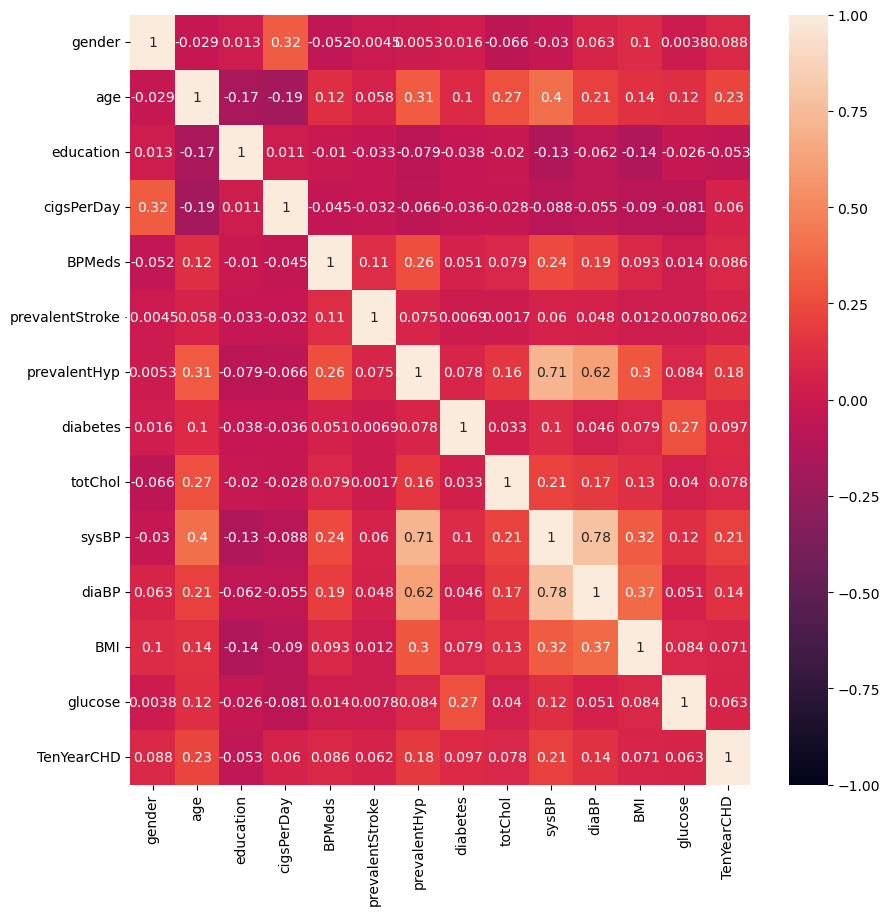

In [136]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, vmin= -1, vmax=1)


In [137]:
#sns.pairplot(data=data,kind="reg")

In [138]:
# # MODELl-1 LOGISTIC REGRESSION

In [139]:
data.columns

Index(['gender', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'glucose', 'TenYearCHD'],
      dtype='object')

In [140]:
X=data[['gender', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'glucose']]
y=data[['TenYearCHD']]

In [141]:
model1=LogisticRegression(solver="liblinear",random_state=0)
model1                          

LogisticRegression(random_state=0, solver='liblinear')

In [142]:
model1.fit(X,y)

LogisticRegression(random_state=0, solver='liblinear')

In [143]:
model1.intercept_

array([-5.55199649])

In [144]:
model1.coef_

array([[ 4.70191856e-01,  5.39420213e-02, -5.25308242e-02,
         1.88301613e-02,  3.16504273e-01,  7.64461993e-01,
         4.31779533e-01,  8.22042465e-01,  5.74871181e-04,
         1.35012516e-02, -1.06896085e-02, -1.38336876e-02,
        -1.88513037e-03]])

In [145]:
y_pred=model1.predict(X)

In [146]:
confusion_matrix=metrics.confusion_matrix(y,y_pred)
confusion_matrix

array([[3582,   12],
       [ 611,   33]], dtype=int64)

In [147]:
model1.score(X,y)

0.8529966965549788

In [148]:
#classification report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3594
           1       0.73      0.05      0.10       644

    accuracy                           0.85      4238
   macro avg       0.79      0.52      0.51      4238
weighted avg       0.84      0.85      0.79      4238



In [149]:
# roc curve
y_pred_prob=model1.predict_proba(X)
fpr,tpr,threshold=roc_curve(data["TenYearCHD"],y_pred_prob[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.7298521172278158


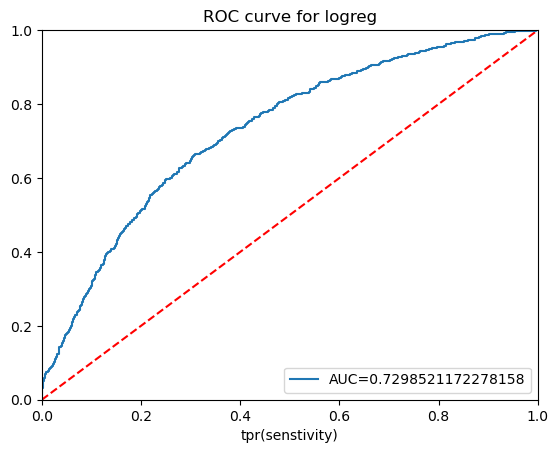

In [150]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr,label="AUC="+str(roc_auc))
plt.legend(loc=4)
plt.show()

In [151]:
# # USING GLM METHOD- MODEL 2

In [152]:
data.columns

Index(['gender', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'glucose', 'TenYearCHD'],
      dtype='object')

In [153]:
model2=smf.glm(formula='TenYearCHD~gender+age+education+cigsPerDay+BPMeds+prevalentStroke+prevalentHyp+diabetes+totChol+sysBP+diaBP+BMI+glucose', 
               data=data,family=sm.families.Binomial())
result=model2.fit()

In [154]:
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 4238
Model:                            GLM   Df Residuals:                     4224
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1611.0
Date:                Tue, 17 Jan 2023   Deviance:                       3222.0
Time:                        11:55:07   Pearson chi2:                 4.20e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08782
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.0297      0.682    -

In [155]:
#data.drop(columns=['education','BPMeds','totChol','diaBP','BMI','glucose'],axis = 1,inplace=True)

In [156]:
model3=smf.glm(formula='TenYearCHD~age+cigsPerDay++prevalentStroke+prevalentHyp+diabetes+sysBP',data=data,family=sm.families.Binomial())
result1=model3.fit()

In [157]:
print(result1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TenYearCHD   No. Observations:                 4238
Model:                            GLM   Df Residuals:                     4231
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1625.3
Date:                Tue, 17 Jan 2023   Deviance:                       3250.6
Time:                        11:55:07   Pearson chi2:                 4.14e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.08164
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -7.3258      0.445    -

In [158]:
predictions3=result1.predict()
predictions3

array([0.03396775, 0.06372856, 0.12918942, ..., 0.13451128, 0.08905403,
       0.10660835])

In [159]:
predictions_nominal3=[0 if x<0.5 else 1 for x in predictions3]

In [160]:
fpr3,tpr3,threshold3=roc_curve(data["TenYearCHD"],predictions3)
roc_auc3=auc(fpr3,tpr3)
print(roc_auc3)

0.7252336969483301


In [161]:
print(classification_report(data["TenYearCHD"],predictions_nominal3))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3594
           1       0.65      0.06      0.11       644

    accuracy                           0.85      4238
   macro avg       0.75      0.53      0.51      4238
weighted avg       0.82      0.85      0.80      4238



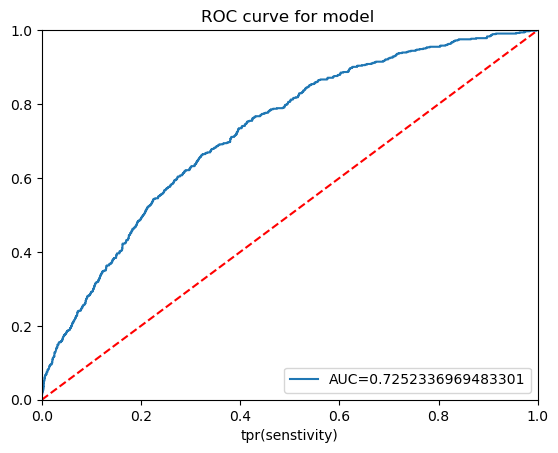

In [162]:
#roc curve
plt.title("ROC curve for model ")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr3,tpr3,label="AUC="+str(roc_auc3))
plt.legend(loc=4)
plt.show()

In [163]:
#decision tree

In [164]:
x1=data.iloc[:,0:-1]
y1=data.iloc[:,-1]

In [165]:
x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size = 0.20, random_state = 1)

In [166]:
print (x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3390, 13) (848, 13) (3390,) (848,)


In [167]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [168]:
clf=tree.DecisionTreeClassifier(random_state=40)

In [169]:
model4=clf.fit(x_train, y_train)

In [170]:
y_train_pred= model4.predict(x_train)
y_train_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [171]:
y_test_pred= model4.predict(x_test)
y_test_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [172]:
accuracy_score(y_train,y_train_pred)

1.0

In [173]:
accuracy_score(y_test,y_test_pred)

0.7582547169811321

In [174]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

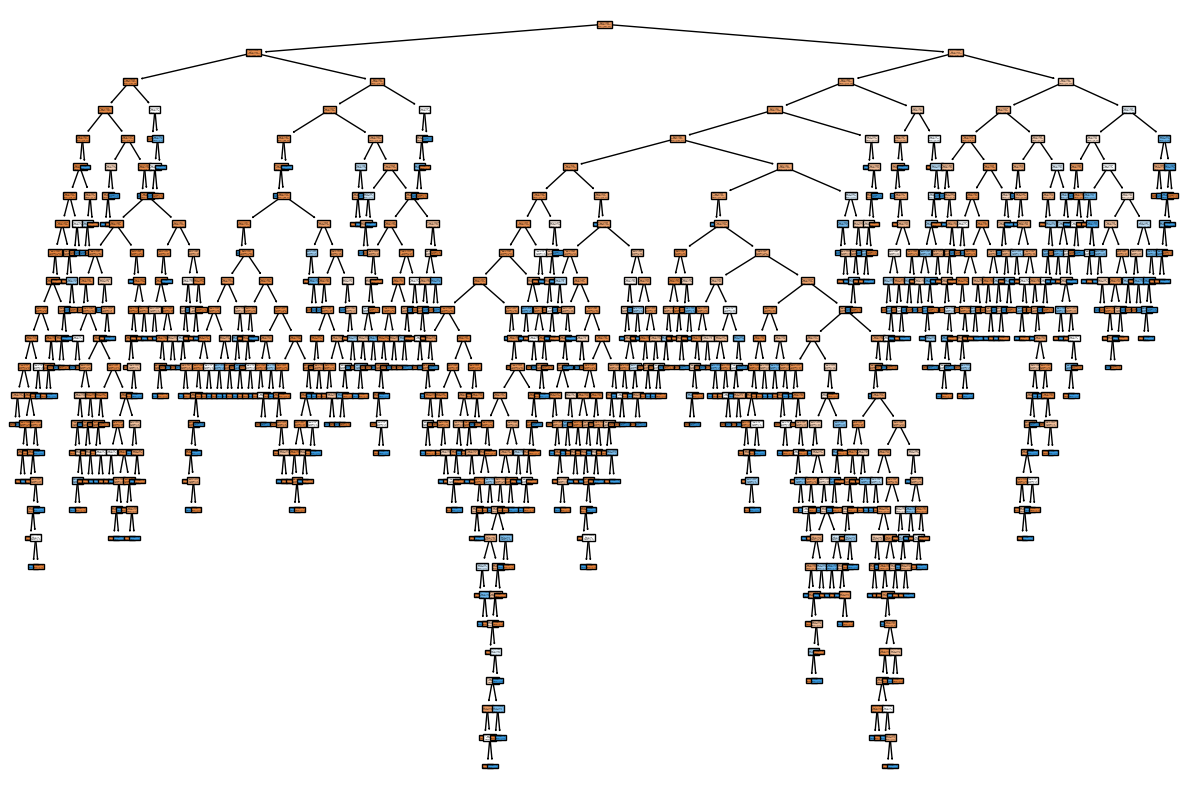

In [175]:
plt.figure(figsize=(15,10))
a = plot_tree(model4,filled=True)
plt.show()

In [176]:
model4.get_depth()

26

In [177]:
depth = [1,2,3,4,5]

accuracy_train,accuracy_test= [],[]

for i in depth:
    tree = DecisionTreeClassifier(max_depth= i, random_state=50)
    
    tree.fit(x_train, y_train)
    y_train_pred1=tree.predict(x_train)
    y_test_pred1=tree.predict(x_test)
    
    accuracy_train.append(accuracy_score(y_train, y_train_pred1))
    accuracy_test.append(accuracy_score(y_test, y_test_pred1))

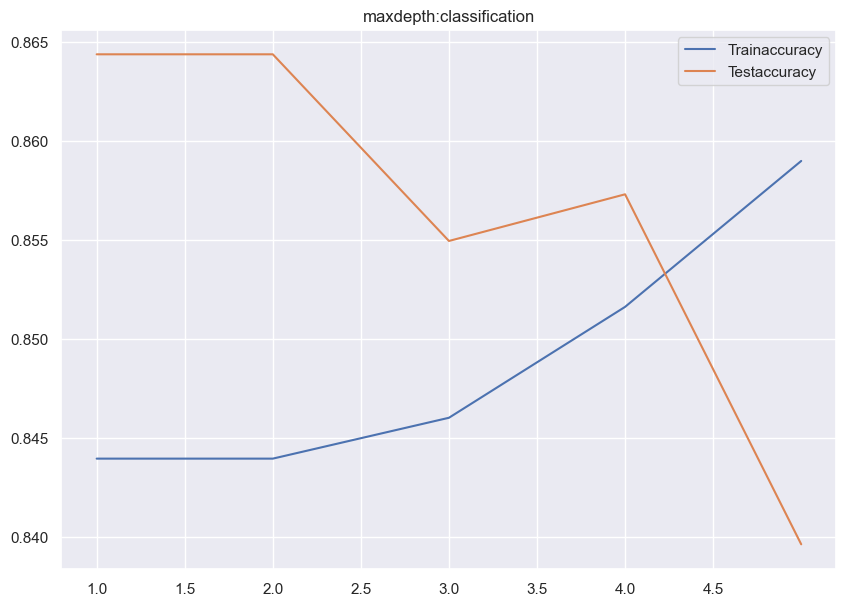

In [178]:
sns.set()
plt.figure(figsize = (10,7))
sns.lineplot(y=accuracy_train,x = depth, label = 'Trainaccuracy')
sns.lineplot(y=accuracy_test, x = depth, label = 'Testaccuracy')
plt.title("maxdepth:classification")
plt.xticks(ticks=np.arange(1,5,0.5))
plt.show()

In [179]:
tree2= DecisionTreeClassifier(max_depth=4, random_state=50)    
tree2.fit(x_train, y_train)
y_train_pred2=tree2.predict(x_train)
y_train_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [180]:
y_test_pred2=tree2.predict(x_test)
y_test_pred2

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [181]:
accuracytrain=(accuracy_score(y_train,y_train_pred2))
accuracytrain

0.8516224188790561

In [182]:
accuracytest=(accuracy_score(y_test,y_test_pred2))
accuracytest

0.8573113207547169

In [184]:
pd.crosstab(y_test,y_test_pred2,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,722,11,733
1,110,5,115
All,832,16,848


In [185]:
print(classification_report(y_test, y_test_pred2))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       733
           1       0.31      0.04      0.08       115

    accuracy                           0.86       848
   macro avg       0.59      0.51      0.50       848
weighted avg       0.79      0.86      0.81       848



In [186]:
# roc curve
y_pred_prob=tree2.predict_proba(x_test)
fpr4,tpr4,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc4=auc(fpr4,tpr4)
print(roc_auc4)

0.6716768491606857


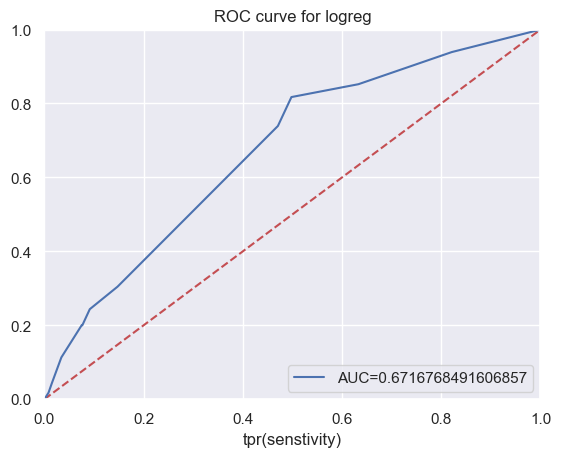

In [187]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr4,tpr4,label="AUC="+str(roc_auc4))
plt.legend(loc=4)
plt.show()

In [188]:
#Random forest

In [189]:
model5= RandomForestClassifier(n_estimators =100, random_state = 0 )
model5

RandomForestClassifier(random_state=0)

In [190]:
model5.fit(x_train,y_train)
model5

RandomForestClassifier(random_state=0)

In [191]:
y_predRF= model5.predict(x_test)
y_predRF

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [192]:
confusion_matrix=metrics.confusion_matrix(y_test,y_predRF)
confusion_matrix

array([[727,   6],
       [109,   6]], dtype=int64)

In [193]:
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       733
           1       0.50      0.05      0.09       115

    accuracy                           0.86       848
   macro avg       0.68      0.52      0.51       848
weighted avg       0.82      0.86      0.81       848



In [194]:
# roc curve
y_pred_prob=model5.predict_proba(x_test)
fpr5,tpr5,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc5=auc(fpr5,tpr5)
print(roc_auc5)

0.6912746900765169


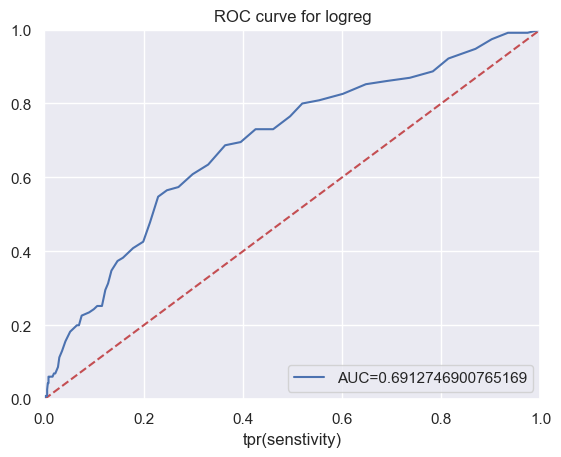

In [195]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr5,tpr5,label="AUC="+str(roc_auc5))
plt.legend(loc=4)
plt.show()

In [196]:
#Random forest using Grid search

In [197]:
param_grid = {'max_depth': [4,5,6,7,8,9,10,11,12,13,14,15,16,17],
              'max_features': ['auto', 'log2'],
              'n_estimators': [25,50,100,150,200]}

In [198]:
rfc= RandomForestClassifier(random_state = 1)
rfc

RandomForestClassifier(random_state=1)

In [199]:
g_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3)

In [200]:
model6= g_search.fit(x_train,y_train)

In [201]:
print(model6.best_params_)

{'max_depth': 8, 'max_features': 'auto', 'n_estimators': 150}


In [202]:
y_pred= model6.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [203]:
pd.crosstab(y_test,y_pred,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,730,3,733
1,114,1,115
All,844,4,848


In [204]:
accuracytest=(accuracy_score(y_test, y_pred))
accuracytest

0.8620283018867925

In [205]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       733
           1       0.25      0.01      0.02       115

    accuracy                           0.86       848
   macro avg       0.56      0.50      0.47       848
weighted avg       0.78      0.86      0.80       848



In [206]:
# roc curve
y_pred_prob=model6.predict_proba(x_test)
fpr6,tpr6,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc6=auc(fpr6,tpr6)
print(roc_auc6)

0.7050596120766356


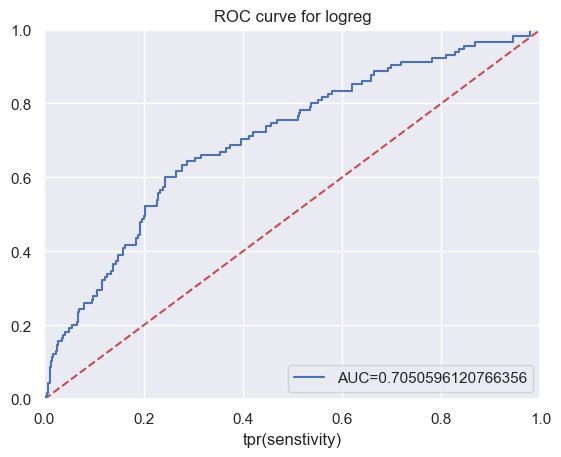

In [207]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr6,tpr6,label="AUC="+str(roc_auc6))
plt.legend(loc=4)
plt.show()

In [208]:
#Adaptive boosting

In [209]:
model7= AdaBoostClassifier(base_estimator=None, n_estimators=50,learning_rate=1.0,algorithm='SAMME.R',random_state=None)
model7

AdaBoostClassifier()

In [210]:
model7 = model7.fit(x_train,y_train)
model7

AdaBoostClassifier()

In [211]:
y_predAB=model7.predict(x_test)
y_predAB

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [212]:
pd.crosstab(y_test,y_predAB,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,720,13,733
1,107,8,115
All,827,21,848


In [213]:
print(classification_report(y_test,y_predAB))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       733
           1       0.38      0.07      0.12       115

    accuracy                           0.86       848
   macro avg       0.63      0.53      0.52       848
weighted avg       0.80      0.86      0.81       848



In [214]:
y_pred_prob=model7.predict_proba(x_test)
fpr7,tpr7,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc7=auc(fpr7,tpr7)
print(roc_auc7)

0.6820985823595704


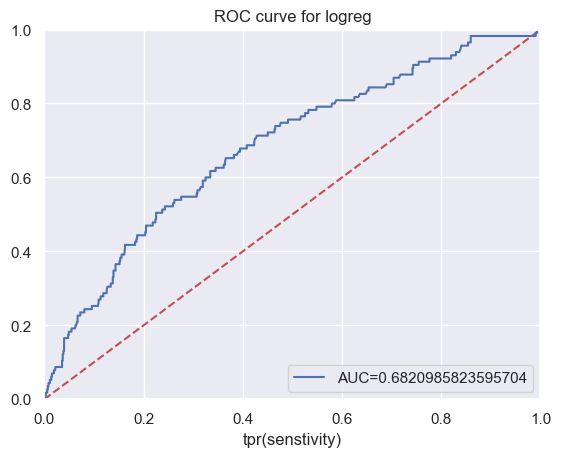

In [215]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr7,tpr7,label="AUC="+str(roc_auc7))
plt.legend(loc=4)
plt.show()

In [216]:
# gradient boosting

In [217]:
model8= GradientBoostingClassifier(max_depth=1,n_estimators =50,learning_rate=1.0,random_state=0)
model8

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=50,
                           random_state=0)

In [218]:
model8 = model8.fit(x_train,y_train)
model8

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=50,
                           random_state=0)

In [219]:
y_predGB=model8.predict(x_test)
print(y_predGB)

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [220]:
pd.crosstab(y_test,y_predGB,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,723,10,733
1,106,9,115
All,829,19,848


In [221]:
print(classification_report(y_test,y_predGB))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       733
           1       0.47      0.08      0.13       115

    accuracy                           0.86       848
   macro avg       0.67      0.53      0.53       848
weighted avg       0.82      0.86      0.82       848



In [222]:
y_pred_prob=model8.predict_proba(x_test)
fpr8,tpr8,threshold=roc_curve(y_test,y_pred_prob[:,-1])
roc_auc8=auc(fpr8,tpr8)
print(roc_auc8)

0.6909069339818495


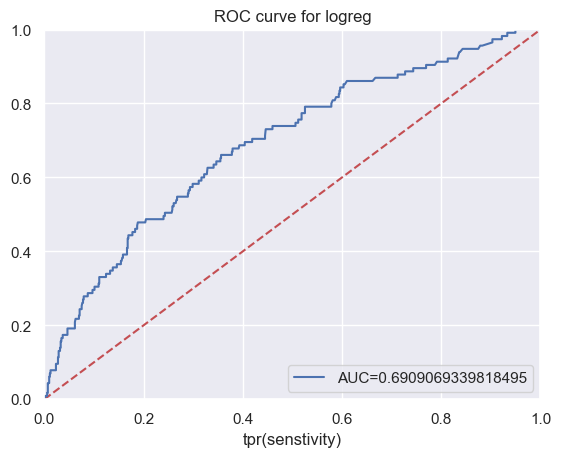

In [223]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr8,tpr8,label="AUC="+str(roc_auc8))
plt.legend(loc=4)
plt.show()

In [224]:
#navie baye classifier

In [225]:
model8=GaussianNB()

In [226]:
model8=model8.fit(x_train,y_train)

In [227]:
y_pred=model8.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [228]:
pd.crosstab(y_test,y_pred,margins=True,rownames=['Actual'],colnames=['preddict'])

preddict,0,1,All
Actual,,,
0,685,48,733
1,96,19,115
All,781,67,848


In [229]:
accuracy_score(y_test,y_pred)

0.8301886792452831

In [230]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       733
           1       0.28      0.17      0.21       115

    accuracy                           0.83       848
   macro avg       0.58      0.55      0.56       848
weighted avg       0.80      0.83      0.81       848



In [231]:
y_pred_prob=model8.predict_proba(x_test)
fpr8,tpr8,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc8=auc(fpr8,tpr8)
print(roc_auc8)

0.6953793226169998


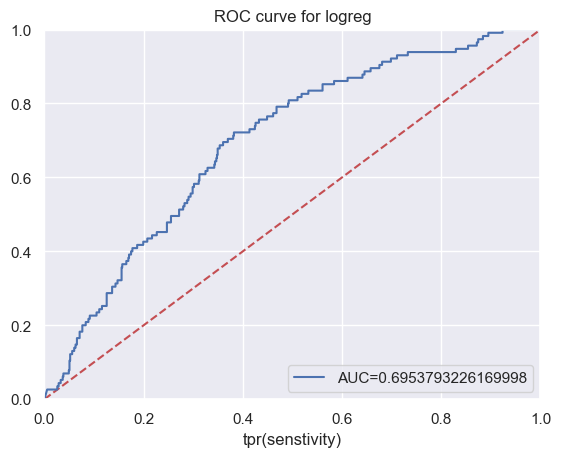

In [232]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr8,tpr8,label="AUC="+str(roc_auc8))
plt.legend(loc=4)
plt.show()

In [233]:
#Knn neighbour

In [234]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='ball_tree',leaf_size=30,p=2,metric='minkowski',metric_params=None,n_jobs=None)

In [235]:
model9=model.fit(x_train,y_train)

In [236]:
y_pred=model9.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [237]:
pd.crosstab(y_test,y_pred,margins=True)

col_0,0,1,All
TenYearCHD,,,
0,710,23,733
1,101,14,115
All,811,37,848


In [238]:
accuracy_score(y_test,y_pred)

0.8537735849056604

In [239]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       733
           1       0.38      0.12      0.18       115

    accuracy                           0.85       848
   macro avg       0.63      0.55      0.55       848
weighted avg       0.81      0.85      0.82       848



In [240]:
y_pred_prob=model9.predict_proba(x_test)
fpr9,tpr9,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc9=auc(fpr9,tpr9)
print(roc_auc9)

0.6512011388575836


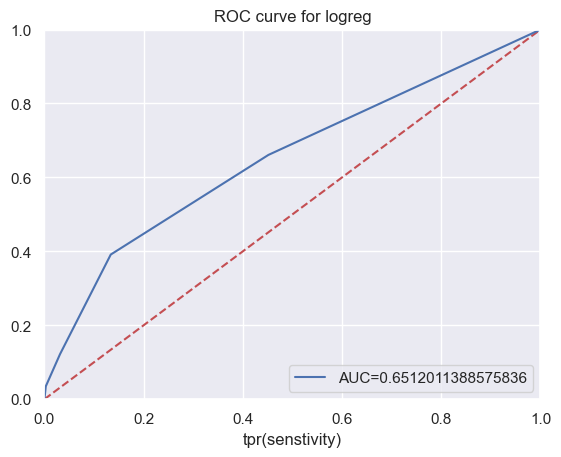

In [241]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr9,tpr9,label="AUC="+str(roc_auc9))
plt.legend(loc=4)
plt.show()